# Regressão Linear com Python

Teste de regressão linear com Python. Foram usados dados fictícios de salário e aprovação de crédito para gera um modelo capaz de ler o salário de um cliente e prever qual sera o valor aprovado do seu empréstimo.

In [2]:
# Improtação de bibliotecas para analise exploratória
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Análise exploratória da base de dados

In [3]:
# entrada da base de dados com pandas
base_dados = pd.read_excel('BaseDados_RegressaoLinear.xlsx', 'Plan1')
base_dados.head()

,Salario,Limite_Emprestimo
0,1250.219130,2900.124323
1,1262.721321,2929.125566
2,1275.348535,2958.416822
3,1288.102020,2988.000990
4,1300.983040,3017.881000


In [4]:
# exibindo as colunas do DataFrame
base_dados.columns 

Index(['Salario', 'Limite_Emprestimo'], dtype='object')

In [5]:
# checando a presença de dados nulos no DataFrame
base_dados.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Salario            99 non-null     float64
 1   Limite_Emprestimo  99 non-null     float64
dtypes: float64(2)
memory usage: 1.7 KB


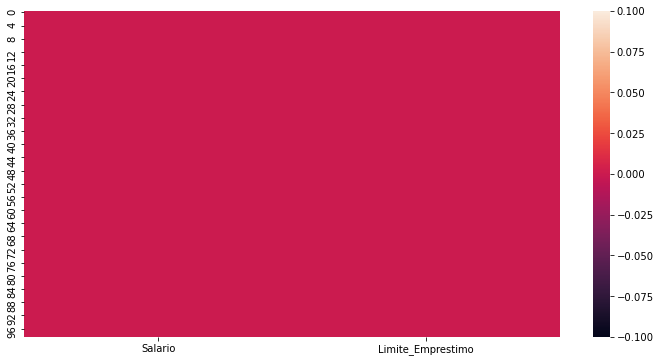

In [12]:
# Outra forma de verificar a presença de dados nulos na base de dados
plt.figure(figsize=(12,6))
sns.heatmap(base_dados.isnull());

In [6]:
# principais medidas estatísticas das variáveis do DF
base_dados.describe() 

,Salario,Limite_Emprestimo
count,99.000000,99.000000
mean,2119.100581,4900.652060
std,600.832983,1378.113961
min,1250.219130,2900.124323
25%,1595.383780,3700.800280
50%,2035.792243,4722.412623
75%,2597.840528,6026.191986
max,3314.978916,7423.384910


In [7]:
# Separando a base de dados em eixos e convertendo eles em arrays para otimizar o uso de poder computacional no modelo
eixo_x = base_dados.iloc[:,0].values
eixo_y = base_dados.iloc[:,1].values

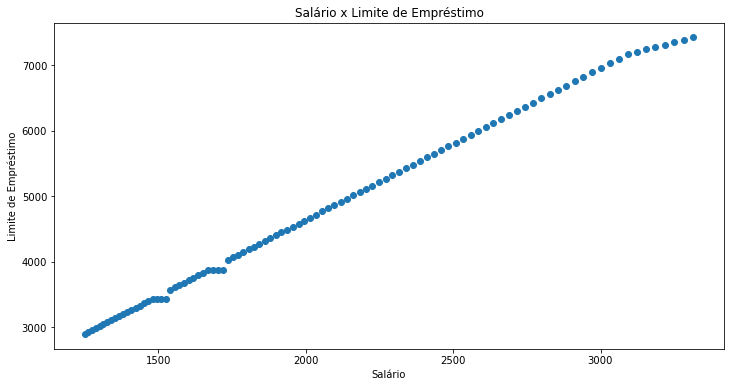

In [11]:
# Visualização gráfica dos dados do DataFrame
plt.figure(figsize=(12,6))
plt.scatter(eixo_x, eixo_y)
plt.title('Salário x Limite de Empréstimo')
plt.xlabel('Salário')
plt.ylabel('Limite de Empréstimo');

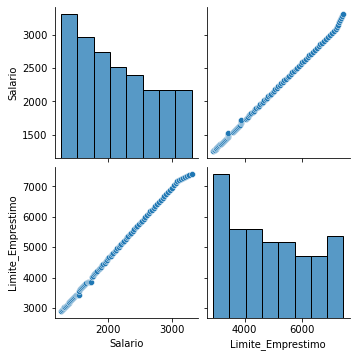

In [16]:
sns.pairplot( base_dados );

## Preparação dos dados para o modelo de regressão

In [17]:
# Entendendo a correlação dos dados do DataFrame
correlacao = np.corrcoef(eixo_x, eixo_y)
correlacao
# Na saída a gente vê que há uma forte correlação entre os dados (coeficiente de correlação = 0,999)

array([[1.        , 0.99949773],
       [0.99949773, 1.        ]])

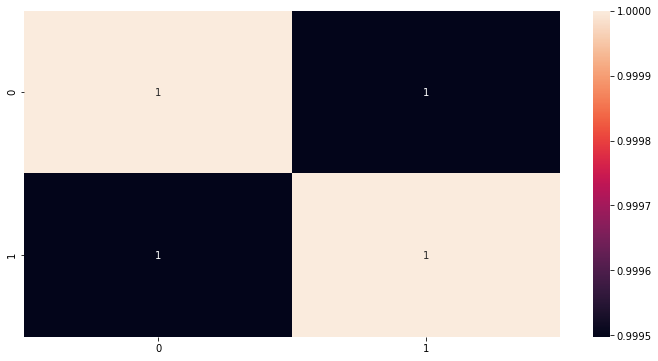

In [18]:
# Usando um heatmap para visualização da correlação
plt.figure(figsize=(12,6))
sns.heatmap(correlacao, annot=True);

In [19]:
# Convertendo as arrays para matrizes para fazemos a divisão dos dados de treino e teste do modelo
eixo_x = eixo_x.reshape(-1, 1) #Os valores -1 e 1 servem para indicar quais atributos (linha ou coluna) será mexido. No caso, apenas colunas
eixo_y = eixo_y.reshape(-1, 1)

In [22]:
# Separação dos dados de treino e de teste
from sklearn.model_selection import train_test_split

x_treinamento, x_teste, y_treinamento, y_teste = train_test_split(eixo_x, eixo_y, test_size=0.20)

In [24]:
# Importando e criando a função de regressão
from sklearn.linear_model import LinearRegression

funcao_regressao = LinearRegression()

# Usando os dados para treinar o modelo
funcao_regressao.fit(x_treinamento, y_treinamento)

LinearRegression()

In [25]:
# Usando o método score para checar a perfomance do modelo
funcao_regressao.score(x_treinamento, y_treinamento)

0.9988031106075697

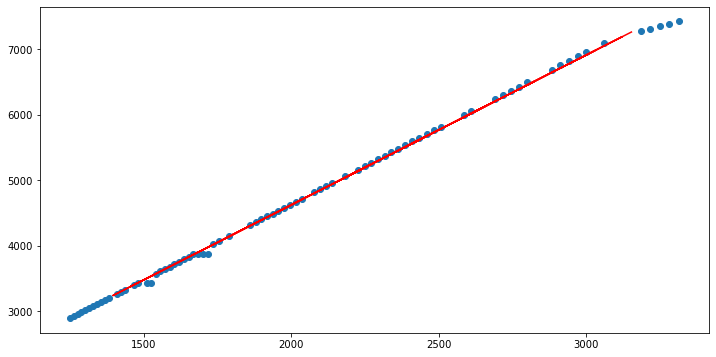

In [27]:
# Visualização da reta da regressão 
plt.figure(figsize=(12,6))
plt.scatter(x_treinamento, y_treinamento)
plt.plot(x_teste, funcao_regressao.predict(x_teste), color='red');

Verificação do erro do modelo para definição do intervalo de confiança das previsões

In [29]:
previsoes = funcao_regressao.predict(x_teste)

from sklearn import metrics
print('RMSE', np.sqrt(metrics.mean_squared_error(y_teste, previsoes)))

RMSE 29.488545138411244


Testes das previsões com o modelo gerado

In [41]:
print(funcao_regressao.predict([[3180]]))

[[7321.62994735]]


Com os dados do modelo, podemos dizer que uma pessoa com salário de 3.180,00 reais teria um empréstimo aprovado entre 7.292,14 reais e 7.351,12 reais.